# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석과 잠재 디리클레 할당 기법이 있음

## 잠재 의미 분석(Latent Semantic Analysis)

* 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
* 잠재 의미 인덱싱(Latent Semantic Indexing, LSI)로도 알려져 있음
* LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
* 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정

* LSA 방법
  + 문서 모음에서 생성한 문서-단어 행렬(Document Term Matrix)에서 단어-토픽 행렬(Term-Topic Matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽-문서 행렬(Topic-Document Matrix)로 분해

## 잠재 디리클레 할당(Latent Dirichlet Allocation)

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽이 개수를 지정해 알고리즘에 전달
  2. 모든 단어들을 토픽 중 하나에 할당
  3. 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, $p(t|d)$, $p(w|t)$에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $p(t|d)$ - 문서 d의 단어들 중 토픽 t에 해당하는 비율
* 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    

* $p(w|t)$- 단어 w를 가지고 있는 모든 문서들 중  토픽 t가 할당된 비율
* 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

## 데이터 준비

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset=fetch_20newsgroups(shuffle=True, random_state=1,
                           remove=('headers','footers','quotes'))

documents=dataset.data

print(len(documents))
documents[0]

11314


"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import preprocess_string

nltk.download('stopwords')

def clean_text(d):
  pattern=r'[^a-zA-Z\s]' #알파벳만 가져오기
  text=re.sub(pattern,'',d) # pattern으로 해당하는 것은 모두 삭제
  return d

def clean_stopword(d):
  stop_words=stopwords.words('english')
  return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])
  # stop_words에 포함되지 않은 것만 가져오고 w의 길이가 3보다 큰 것만 가져옴

def preprocessing(d):
  return preprocess_string(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd

news_df=pd.DataFrame({'article':documents})
len(news_df)

11314

In [ ]:
news_df.replace('',float('NaN'),inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))

11096


In [ ]:
news_df['article']=news_df['article'].apply(clean_text)
news_df['article']

0        Well i'm not sure about the story nad it did s...
1        \n\n\n\n\n\n\nYeah, do you expect people to re...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well, I will have to change the scoring on my ...
                               ...                        
11309    Danny Rubenstein, an Israeli journalist, will ...
11310                                                   \n
11311    \nI agree.  Home runs off Clemens are always m...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313                                          ^^^^^^\n...
Name: article, Length: 11096, dtype: object

In [ ]:
news_df['article']=news_df['article'].apply(clean_stopword)
news_df['article']

0        well sure story seem biased. what disagree sta...
1        yeah, expect people read faq, etc. actually ac...
2        although realize principle strongest points, w...
3        notwithstanding legitimate fuss proposal, much...
4        well, change scoring playoff pool. unfortunate...
                               ...                        
11309    danny rubenstein, israeli journalist, speaking...
11310                                                     
11311    agree. home runs clemens always memorable. kin...
11312    used deskjet orange micros grappler system6.0....
11313    ^^^^^^ argument murphy. scared hell came last ...
Name: article, Length: 11096, dtype: object

In [ ]:
tokenized_news=news_df['article'].apply(preprocessing)
tokenized_news=tokenized_news.to_list()
tokenized_news

[['sure',
  'stori',
  'bias',
  'disagre',
  'statement',
  'media',
  'ruin',
  'israel',
  'reput',
  'redicul',
  'media',
  'pro',
  'isra',
  'media',
  'world',
  'have',
  'live',
  'europ',
  'realiz',
  'incid',
  'describ',
  'letter',
  'occur',
  'media',
  'ignor',
  'subsid',
  'israel',
  'exist',
  'european',
  'degre',
  'think',
  'reason',
  'report',
  'clearli',
  'atroc',
  'shame',
  'austria',
  'daili',
  'report',
  'inhuman',
  'act',
  'commit',
  'isra',
  'soldier',
  'bless',
  'receiv',
  'govern',
  'make',
  'holocaust',
  'guilt',
  'awai',
  'look',
  'jew',
  'treat',
  'race',
  'power',
  'unfortun'],
 ['yeah',
  'expect',
  'peopl',
  'read',
  'faq',
  'actual',
  'accept',
  'hard',
  'atheism',
  'need',
  'littl',
  'leap',
  'faith',
  'jimmi',
  'logic',
  'run',
  'steam',
  'jim',
  'sorri',
  'piti',
  'jim',
  'sorri',
  'feel',
  'denial',
  'faith',
  'need',
  'pretend',
  'happili',
  'mayb',
  'start',
  'newsgroup',
  'alt',
  '

In [ ]:
import numpy as np
drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
#news_texts = np.delete(tokenized_news, drop_news, axis=0)
news_texts = [sentence for index, sentence in enumerate(tokenized_news) if index not in drop_news]
print(len(news_texts))

10936


## Gensim을 이용한 토픽 모델링

In [ ]:
from gensim import corpora

dictionary=corpora.Dictionary(news_texts)
corpus=[dictionary.doc2bow(text) for text in news_texts]

print(corpus[1])

[(51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 3), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1)]


### 잠재 의미 분석을 위한 `LsiModel`

In [ ]:
from gensim.models import LsiModel

lsi_model=LsiModel(corpus, num_topics=20, id2word=dictionary)
topics=lsi_model.print_topics()
topics

[(0,
  '0.994*"max" + 0.069*"giz" + 0.068*"bhj" + 0.025*"qax" + 0.015*"biz" + 0.014*"nrhj" + 0.014*"bxn" + 0.012*"nui" + 0.011*"ghj" + 0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '-0.408*"file" + -0.335*"output" + -0.216*"entri" + 0.171*"peopl" + 0.153*"know" + -0.137*"onam" + -0.134*"program" + 0.131*"said" + -0.129*"printf" + -0.115*"char"'),
 (3,
  '0.249*"imag" + 0.226*"edu" + -0.214*"output" + -0.165*"peopl" + -0.157*"know" + -0.155*"entri" + -0.153*"said" + 0.153*"avail" + 0.142*"jpeg" + 0.124*"pub"'),
 (4,
  '-0.549*"wire" + -0.223*"ground" + 0.214*"jpeg" + 0.213*"file" + 0.169*"imag" + -0.164*"circuit" + -0.157*"outlet" + -0.139*"connect" + -0.129*"subject" + -0.126*"neutral"'),
 (5,
  '0.400*"jpeg" + 0.345*"imag" + -0.276*"anonym" + 0.246*"wire" + -0.160*"privaci" + -0.156*"internet" + 0.151*"color" + -0.144*"post" + -0.125*"inform" +

In [ ]:
# 각 토픽 수에 대해 일관성 계산하는 함수
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics=20,25
coherence_scores=[]

for num_topics in range(min_topics, max_topics):
  model=LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
  coherence=CoherenceModel(model=model,
                          texts=news_texts,
                          dictionary=dictionary)
  coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

[0.5845457050172291, 0.4662609805407779, 0.4627889593829387, 0.46374321191738155, 0.4173929597467638]


<ipython-input-12-0ca9896fe4b9>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


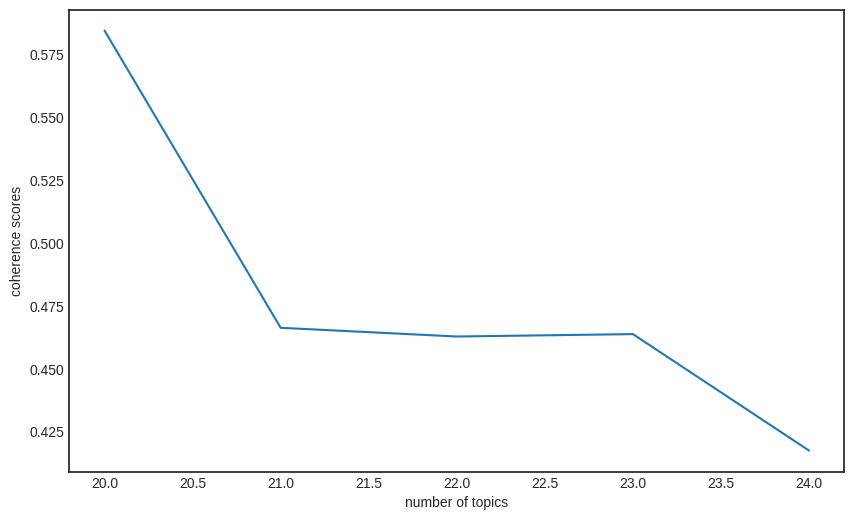

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x=[i for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x,coherence_scores)
plt.xlabel('number of topics')
plt.ylabel('coherence scores')
plt.show()

In [ ]:
# 토픽에 어울리는 단어들 출력
lsi_model=LsiModel(corpus, num_topics=24,id2word=dictionary)
topics=lsi_model.print_topics(num_topics=24)
topics

[(0,
  '0.994*"max" + 0.069*"giz" + 0.068*"bhj" + 0.025*"qax" + 0.015*"biz" + 0.014*"nrhj" + 0.014*"bxn" + 0.012*"nui" + 0.011*"ghj" + 0.011*"zei"'),
 (1,
  '-0.381*"file" + -0.193*"program" + -0.169*"edu" + -0.162*"imag" + -0.130*"avail" + -0.126*"output" + -0.119*"includ" + -0.115*"inform" + -0.101*"pub" + -0.100*"time"'),
 (2,
  '0.408*"file" + 0.335*"output" + 0.216*"entri" + -0.171*"peopl" + -0.153*"know" + 0.137*"onam" + 0.134*"program" + -0.131*"said" + 0.129*"printf" + 0.115*"char"'),
 (3,
  '0.249*"imag" + 0.226*"edu" + -0.214*"output" + -0.165*"peopl" + -0.157*"know" + -0.155*"entri" + -0.153*"said" + 0.153*"avail" + 0.142*"jpeg" + 0.124*"pub"'),
 (4,
  '-0.549*"wire" + -0.223*"ground" + 0.214*"jpeg" + 0.213*"file" + 0.169*"imag" + -0.164*"circuit" + -0.157*"outlet" + -0.139*"connect" + -0.129*"subject" + -0.126*"neutral"'),
 (5,
  '0.400*"jpeg" + 0.345*"imag" + -0.276*"anonym" + 0.246*"wire" + -0.160*"privaci" + -0.156*"internet" + 0.151*"color" + -0.144*"post" + -0.125*"inf

### 잠재 디리클레 할당을 위한 `LdaModel`

In [ ]:
from gensim.models import LdaModel

lda_model=LdaModel(corpus, num_topics=20, id2word=dictionary)
topics=lda_model.print_topics()
topics

[(0,
  '0.015*"jew" + 0.014*"armenian" + 0.011*"israel" + 0.010*"turkish" + 0.008*"turkei" + 0.008*"arab" + 0.008*"pain" + 0.007*"russian" + 0.005*"peopl" + 0.005*"turk"'),
 (1,
  '0.006*"health" + 0.006*"state" + 0.005*"diseas" + 0.005*"studi" + 0.005*"church" + 0.004*"peopl" + 0.004*"medic" + 0.004*"report" + 0.004*"year" + 0.004*"believ"'),
 (2,
  '0.008*"year" + 0.006*"book" + 0.006*"win" + 0.005*"morri" + 0.005*"like" + 0.005*"insur" + 0.005*"player" + 0.005*"canada" + 0.005*"team" + 0.004*"trade"'),
 (3,
  '0.013*"output" + 0.011*"line" + 0.008*"work" + 0.007*"know" + 0.007*"imag" + 0.007*"problem" + 0.006*"look" + 0.006*"like" + 0.005*"help" + 0.005*"time"'),
 (4,
  '0.020*"tobacco" + 0.020*"greek" + 0.014*"water" + 0.008*"greec" + 0.007*"plant" + 0.006*"zionism" + 0.005*"know" + 0.005*"nuclear" + 0.005*"cool" + 0.005*"spacewalk"'),
 (5,
  '0.025*"keyboard" + 0.011*"gov" + 0.010*"xterm" + 0.008*"nist" + 0.007*"list" + 0.007*"nasa" + 0.007*"plot" + 0.005*"moon" + 0.005*"space" + 

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics=20,25
coherence_scores=[]

for num_topics in range(min_topics, max_topics):
  model=LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
  coherence=CoherenceModel(model=model,
                          texts=news_texts,
                          dictionary=dictionary)
  coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

[0.5162579898476753, 0.5087060835009135, 0.5113374316541685, 0.4780521585952327, 0.501273502922199]


<ipython-input-16-0ca9896fe4b9>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


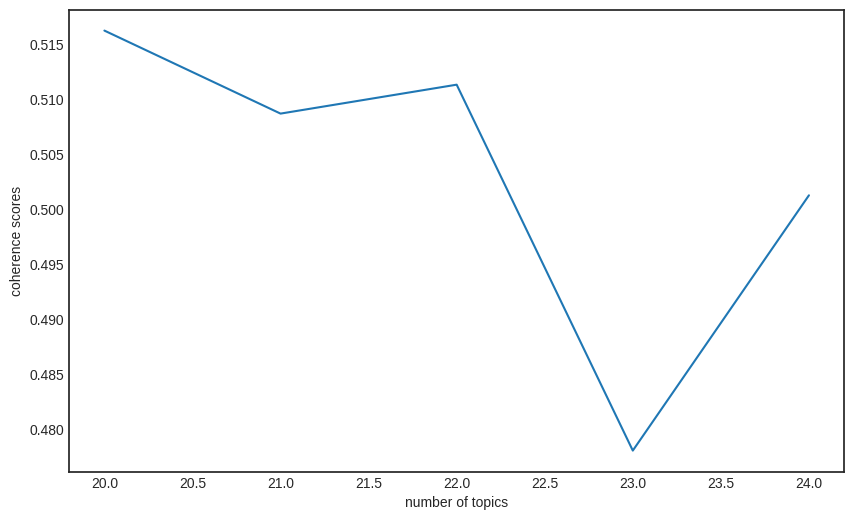

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x=[i for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x,coherence_scores)
plt.xlabel('number of topics')
plt.ylabel('coherence scores')
plt.show()

In [ ]:
lda_model=LdaModel(corpus, num_topics=21,id2word=dictionary)
topics=lda_model.print_topics(num_topics=21)
topics

[(0,
  '0.009*"like" + 0.008*"know" + 0.008*"peopl" + 0.007*"right" + 0.007*"think" + 0.006*"gun" + 0.006*"time" + 0.006*"good" + 0.005*"govern" + 0.004*"state"'),
 (1,
  '0.007*"rider" + 0.007*"car" + 0.007*"book" + 0.005*"vancouv" + 0.005*"auto" + 0.005*"ride" + 0.005*"exhaust" + 0.004*"prog" + 0.004*"cover" + 0.004*"motorcycl"'),
 (2,
  '0.008*"program" + 0.006*"technolog" + 0.006*"like" + 0.005*"develop" + 0.005*"govern" + 0.005*"data" + 0.005*"work" + 0.005*"product" + 0.005*"encrypt" + 0.005*"need"'),
 (3,
  '0.071*"max" + 0.017*"file" + 0.013*"output" + 0.013*"entri" + 0.008*"kei" + 0.007*"line" + 0.006*"program" + 0.006*"bhj" + 0.005*"printf" + 0.005*"like"'),
 (4,
  '0.017*"space" + 0.006*"nasa" + 0.004*"file" + 0.004*"post" + 0.004*"center" + 0.004*"inform" + 0.004*"includ" + 0.004*"servic" + 0.004*"refer" + 0.004*"state"'),
 (5,
  '0.026*"window" + 0.014*"file" + 0.012*"run" + 0.011*"program" + 0.009*"widget" + 0.009*"motif" + 0.008*"keyboard" + 0.008*"problem" + 0.006*"cont

## 토픽 모델링 시각화

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
